# What is a Support Vector Machine(SVM)?
### It is a supervised machine learning problem where we try to find a hyperplane that best separates the two classes. Note: Don’t get confused between SVM and logistic regression. Both the algorithms try to find the best hyperplane, but the main difference is logistic regression is a probabilistic approach whereas support vector machine is based on statistical approaches.

- `Support Vectors:` These are the points that are closest to the hyperplane. A separating line will be defined with the help of these data points.
- `Margin:` it is the distance between the hyperplane and the observations closest to the hyperplane (support vectors). In SVM large margin is considered a good margin. There are two types of margins hard margin and soft margin. I will talk more about these two in the later section.

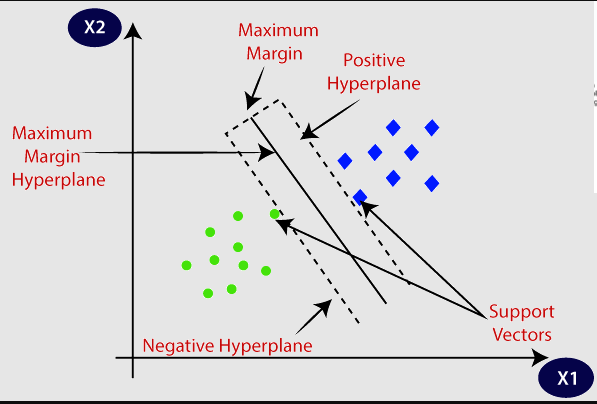

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

## Working with Perfectly Linear Dataset

In [5]:
pip install scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


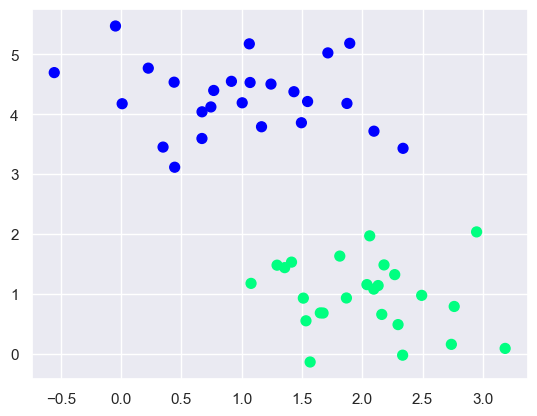

In [8]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plt.show()

In [9]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1)
model.fit(X, y)

SVC(C=1, kernel='linear')

In [10]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

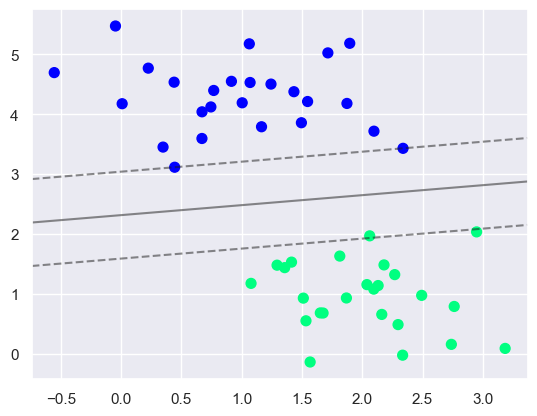

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model);

# The importance of Support Vectors

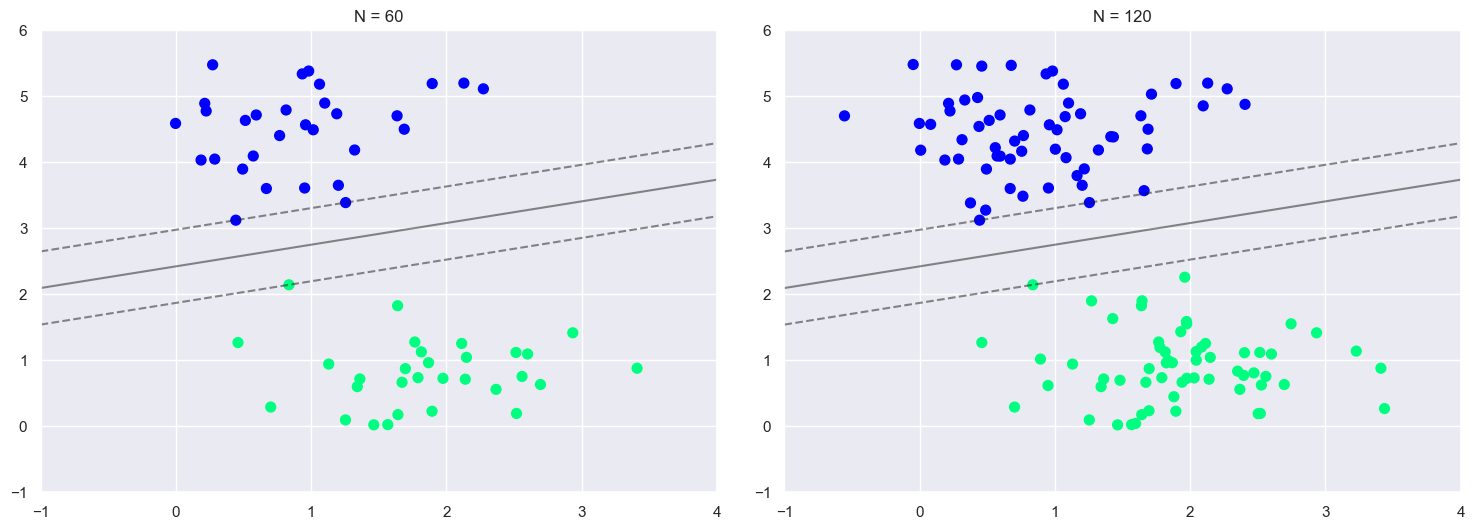

In [12]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

## Working with Almost Linearly Separable Dataset

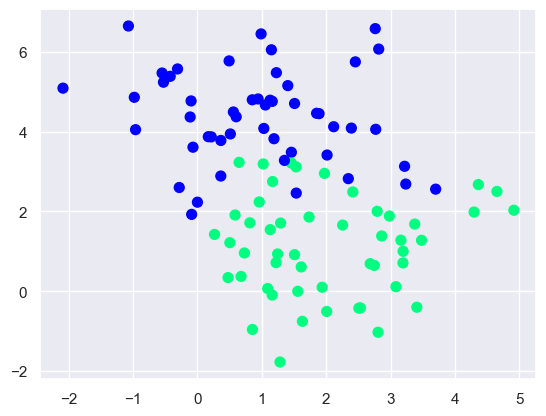

In [13]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter');

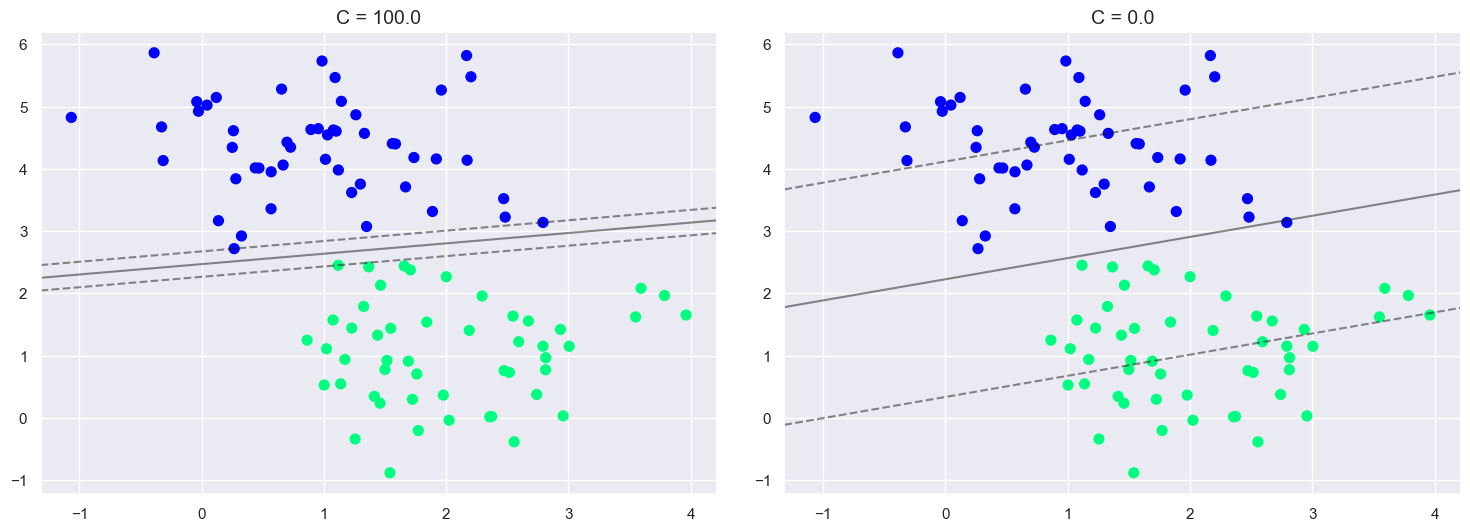

In [14]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [100.0, 0.01]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# How to choose the Correct SVM algorithm?

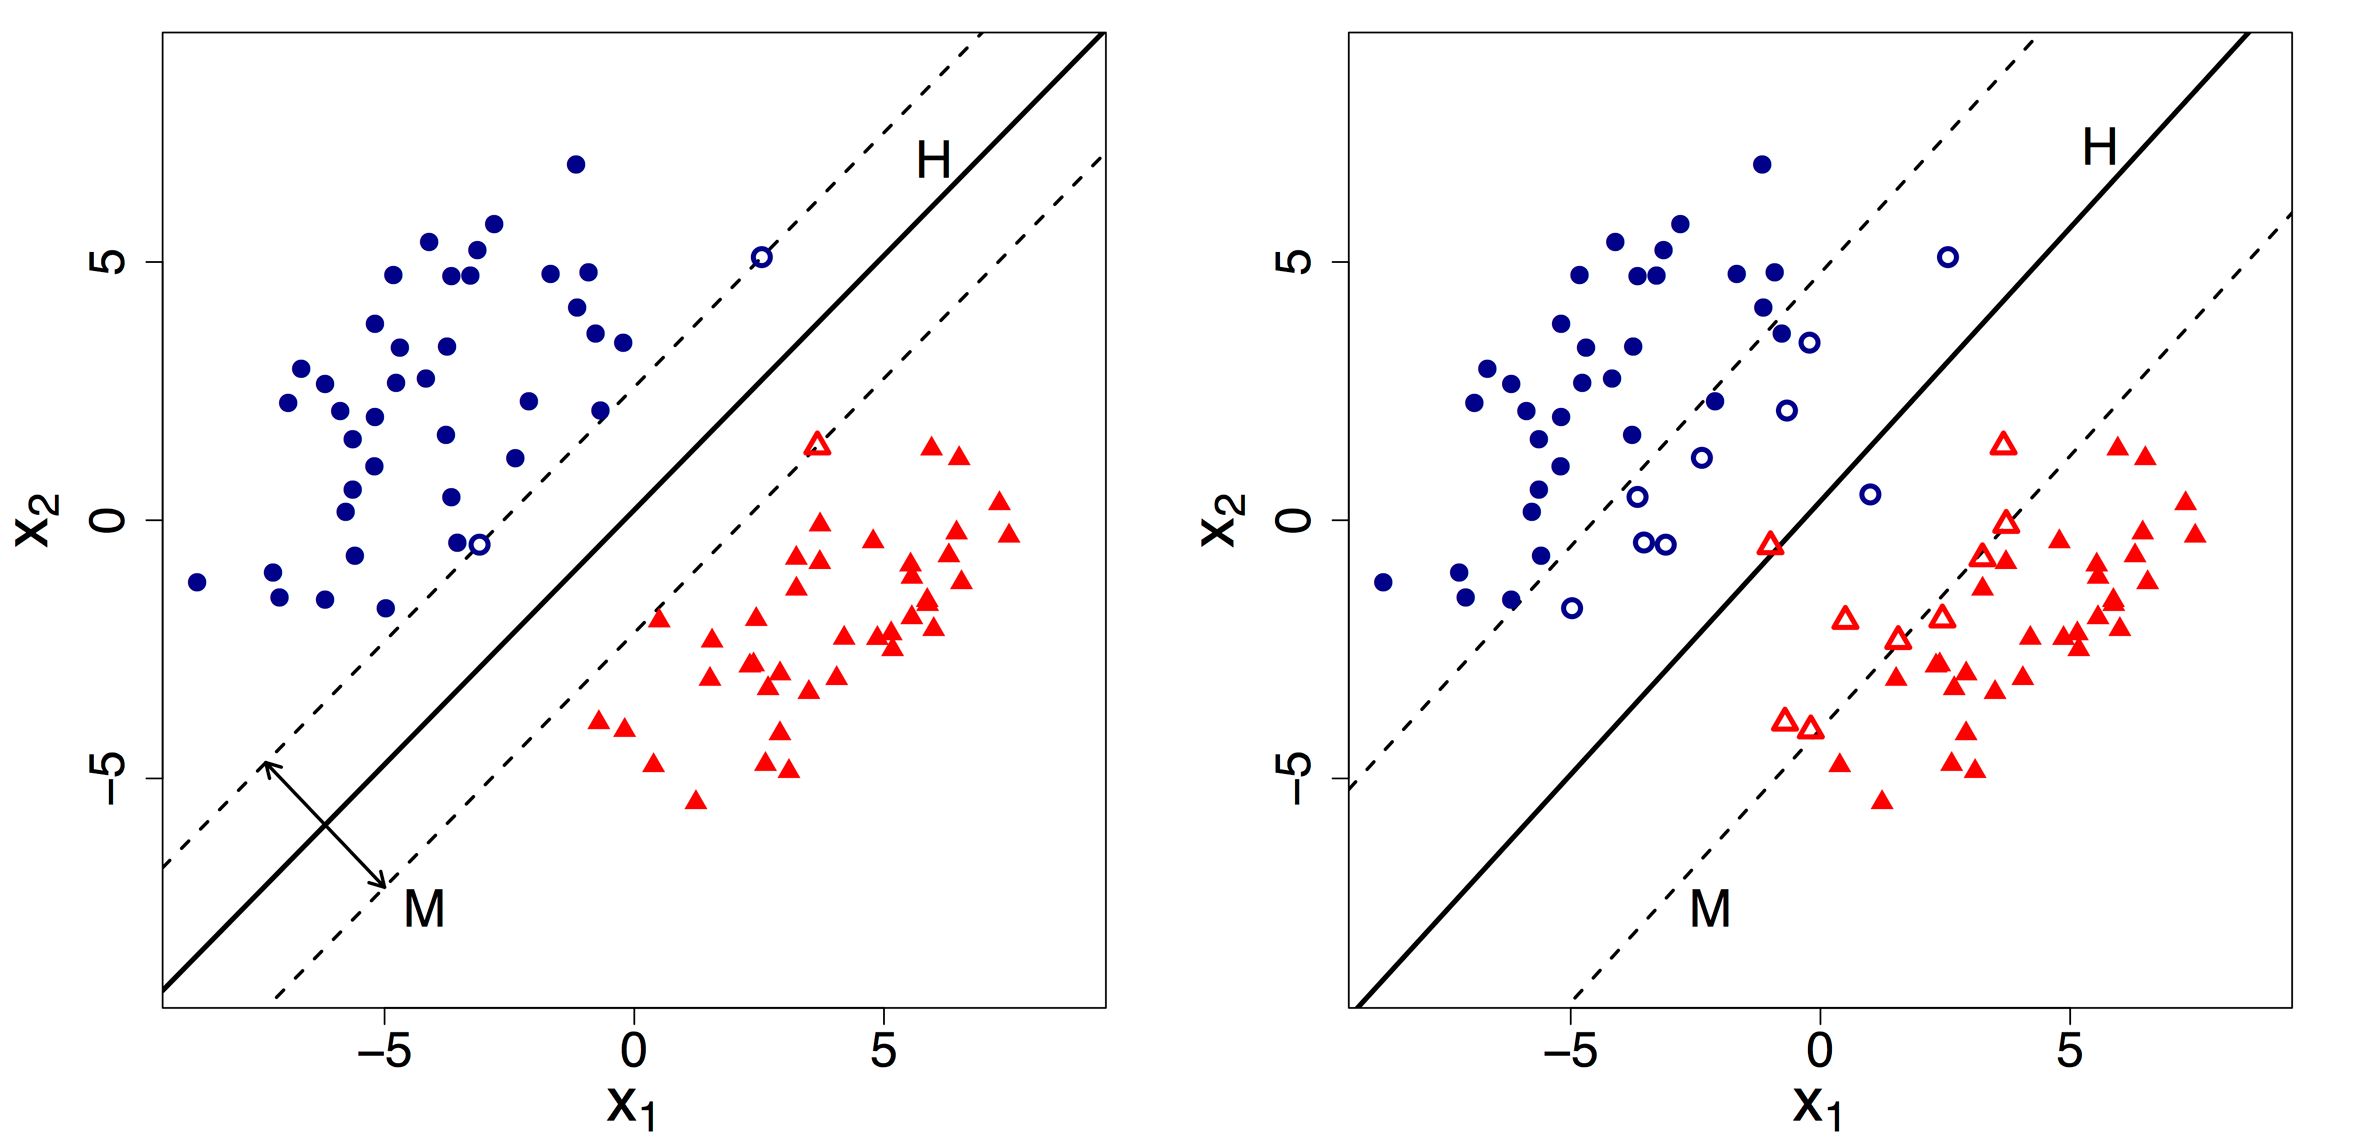

- Suppose we are given 2 Hyperplane one with 100% accuracy (HP1) on the left side and another with >90% accuracy (HP2) on the right side. Which one would you think is the correct classifier?

- Most of us would pick the HP2 thinking that it because of the maximum margin. But it is the wrong answer.

- But Support Vector Machine would choose the HP1 though it has a narrow margin. Because though HP2 has maximum margin but it is going against the constrain that: each data point must lie on the correct side of the margin and there should be no misclassification. This constrain is the hard constrain that Support Vector Machine follows throughout.

# Hard and Soft SVM
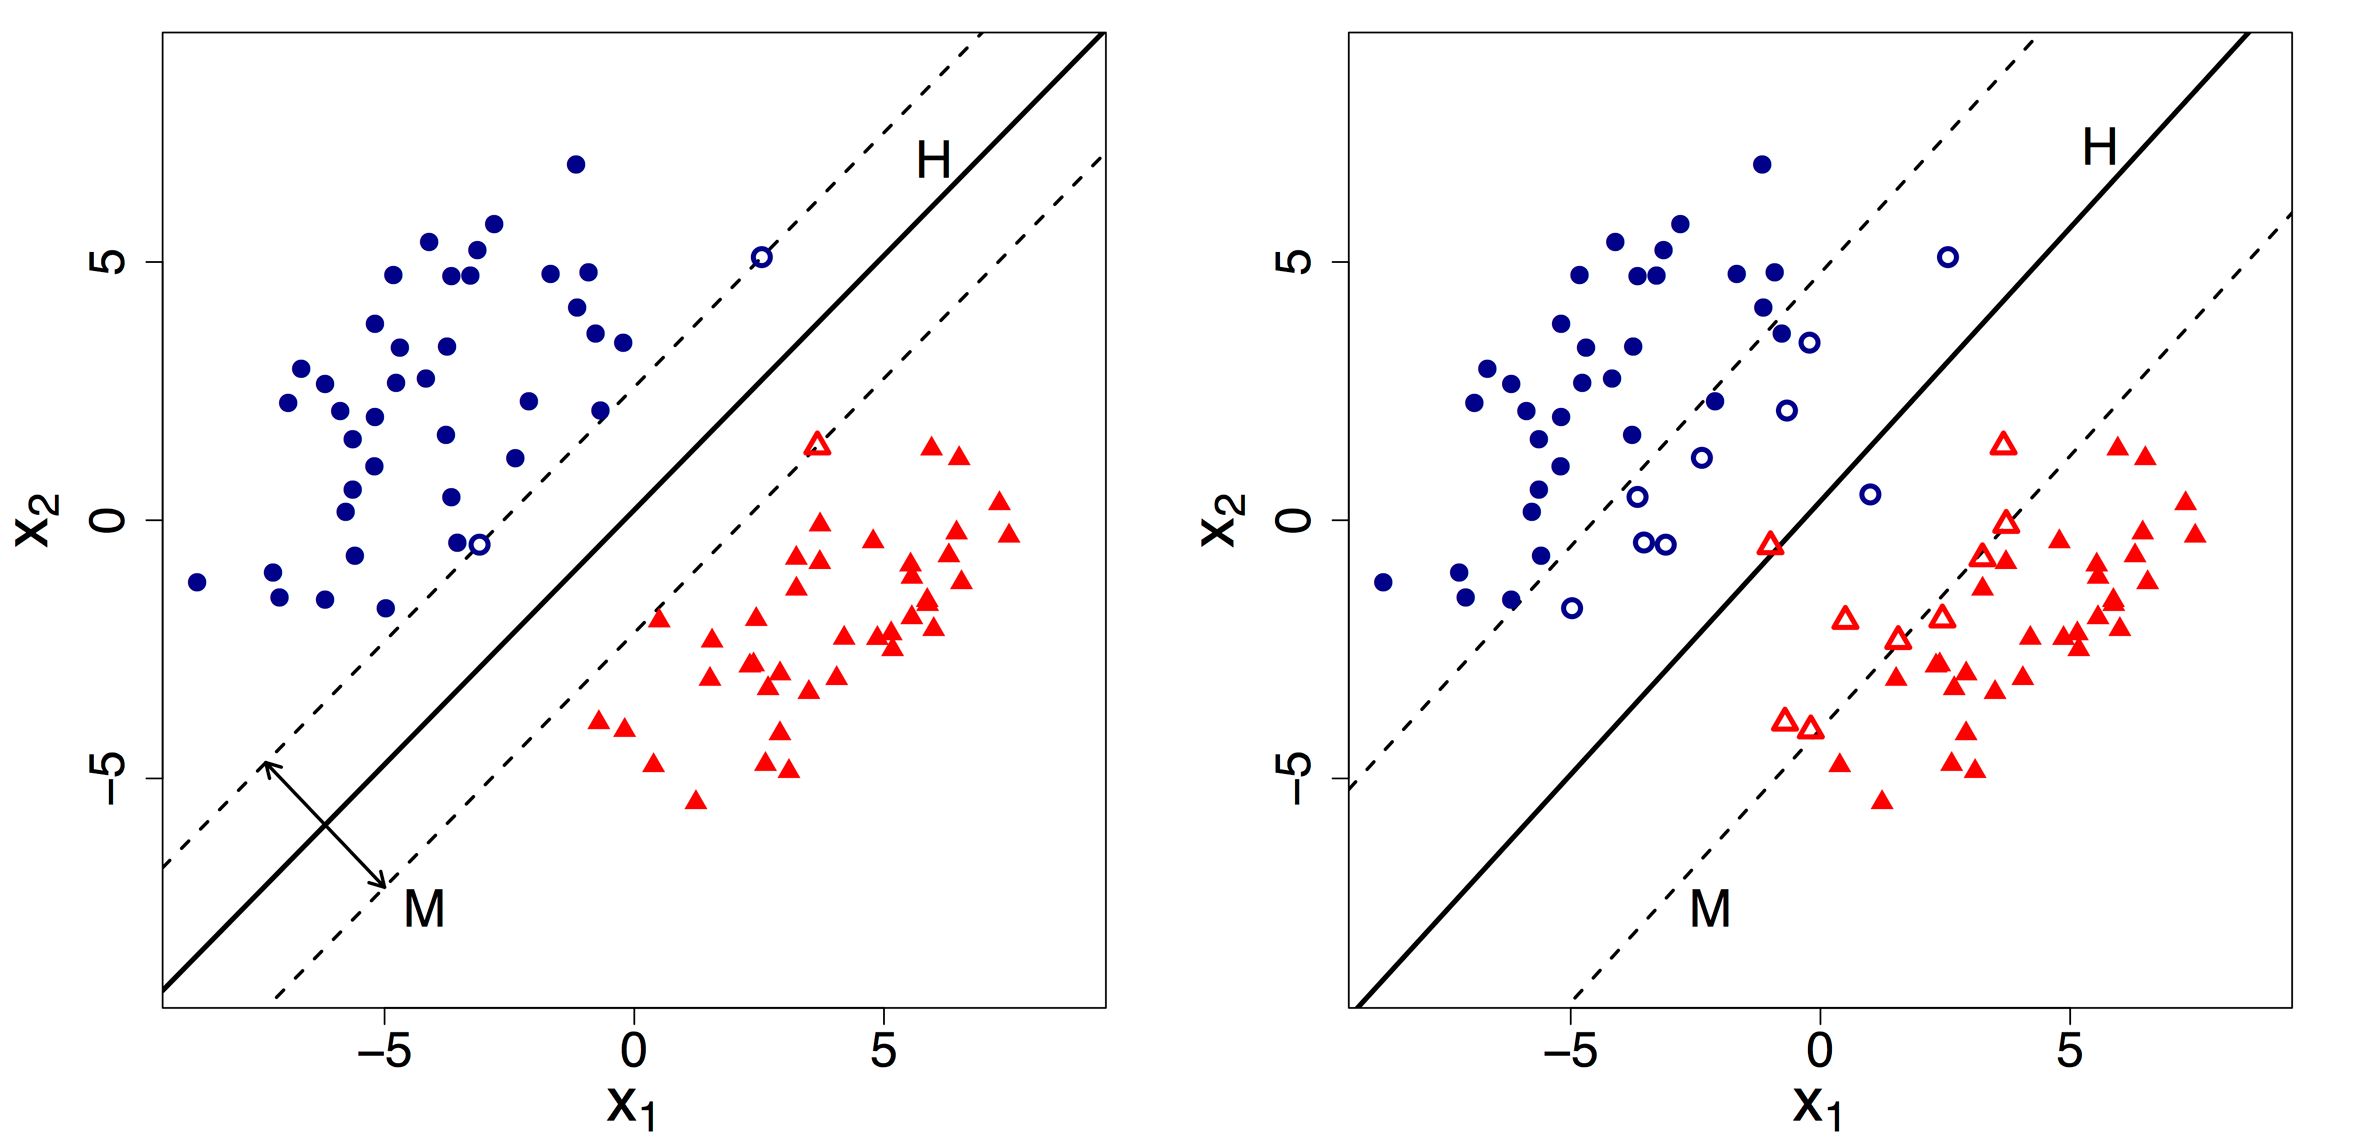

#### We can now clearly state that HP1 is a Hard SVM (left side) while HP2 is a Soft SVM (right side).

#### Hard SVM and Soft SVM are variations of the Support Vector Machine algorithm, differing primarily in how they handle classification errors and the margin

# Hard SVM
### In Hard SVM, the algorithm aims to find the hyperplane that separates the classes with the maximum margin while strictly enforcing that all data points are correctly classified. Assuming that the data is linearly separable, it implies the existence of at least one hyperplane that can perfectly separate the classes without any misclassifications. However, Hard SVM does not tolerate any misclassification errors and demands the data to be perfectly separable, which can be overly restrictive and might lead to poor performance on noisy or overlapping datasets.

# Soft SVM
### Soft SVM, also known as C-SVM (C for the regularization parameter), relaxes the strict requirement of Hard SVM by allowing some misclassification errors. It introduces a regularization parameter (C) that controls the trade-off between maximizing the margin and minimizing the classification error. A smaller value of C allows for a wider margin and more misclassifications, while a larger value of C penalizes misclassifications more heavily, leading to a narrower margin. Soft SVM is suitable for cases where the data may not be perfectly separable or contains noise or outliers. It provides a more robust and flexible approach to classification, often yielding better performance in practical scenarios.

### By default, Support Vector Machine implements Hard margin SVM. It works well only if our data is linearly separable.

### If our data is non-separable or nonlinear, then the Hard margin Support Vector Machine will not return any hyperplane since it cannot separate the data. This is where Soft Margin SVM comes to the rescue, employing techniques such as primal formulation, Gaussian kernel, and dual problem to handle such cases effectively.

# Relation between Regularization parameter (C) and SVM
### Now that we know what the Regularization parameter (C) does. We need to understand its relation with Support Vector Machine.

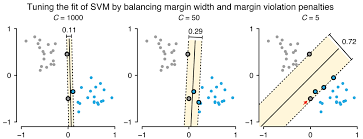

- As the value of C increases the margin decreases thus Hard SVM.
- If the values of C are very small the margin increases thus Soft margin VM.

## Effect on Margin:
- As the value of ( C ) increases, the margin tends to decrease. This means that a higher ( C ) value leads to a narrower margin.
- Conversely, as the value of ( C ) decreases, the margin tends to increase, resulting in a wider margin.
## Effect on Misclassification:
- A larger value of ( C ) penalizes misclassifications more heavily. This leads to a higher likelihood of the algorithm classifying all training examples correctly, potentially resulting in overfitting.
- On the other hand, a smaller value of ( C ) allows for more misclassifications, which can lead to a wider margin and better generalization to unseen data.
> ## Trade-off between Margin and Misclassification:
- A higher \( C \) value prioritizes minimizing the classification error, potentially at the expense of a smaller margin and increased overfitting.
- A lower \( C \) value prioritizes maximizing the margin, potentially leading to more misclassifications but better generalization to unseen data.

# Kernel

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

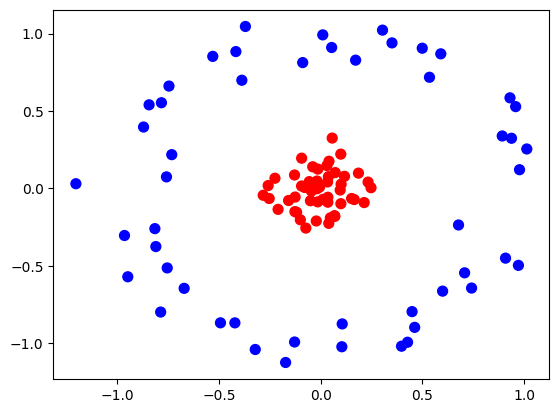

In [7]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')
plt.show()


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [9]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6

In [11]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_9968\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


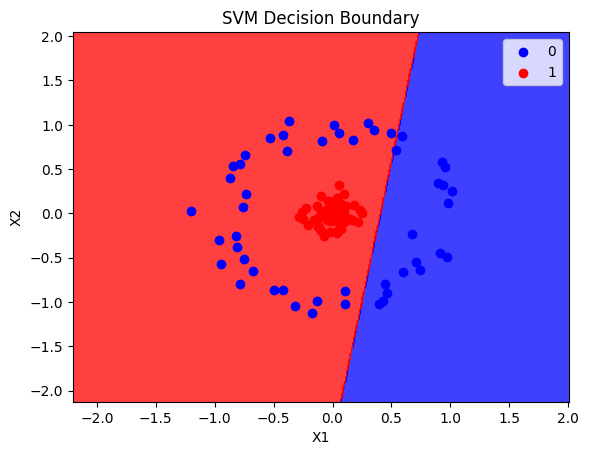

In [12]:
plot_decision_boundary(X, y, classifier)


In [13]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

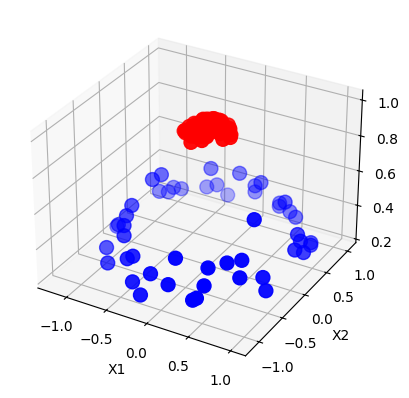

In [14]:
plot_3d_plot(X,y)

In [15]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [16]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_9968\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


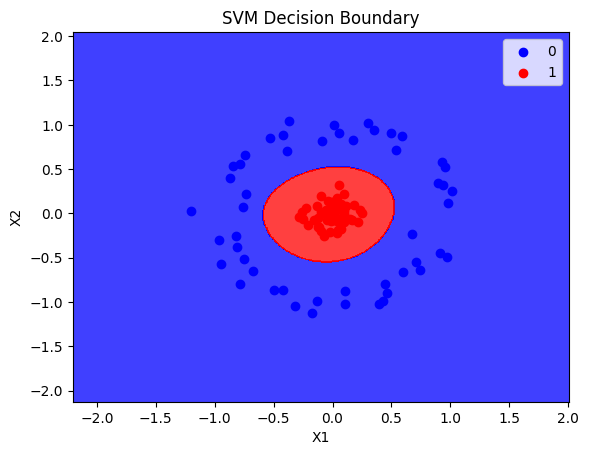

In [17]:
plot_decision_boundary(X, y, rbf_classifier)

In [18]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [19]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_9968\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


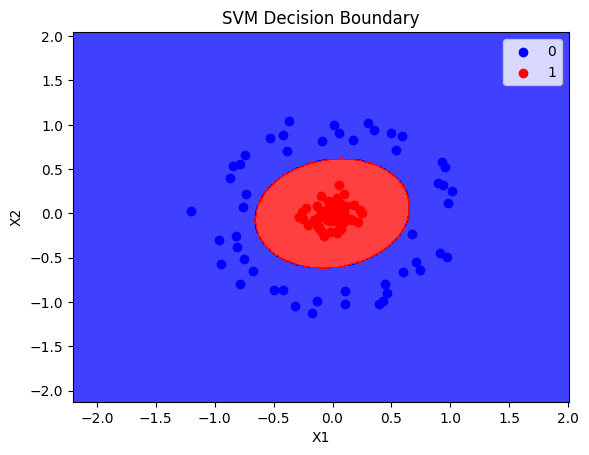

In [20]:
plot_decision_boundary(X, y, poly_classifier)

### confusion with the terms SVM and SVC, the simple answer is if the hyperplane that we are using for classification is in linear condition, then the condition is SVC.

# SVM – Summary
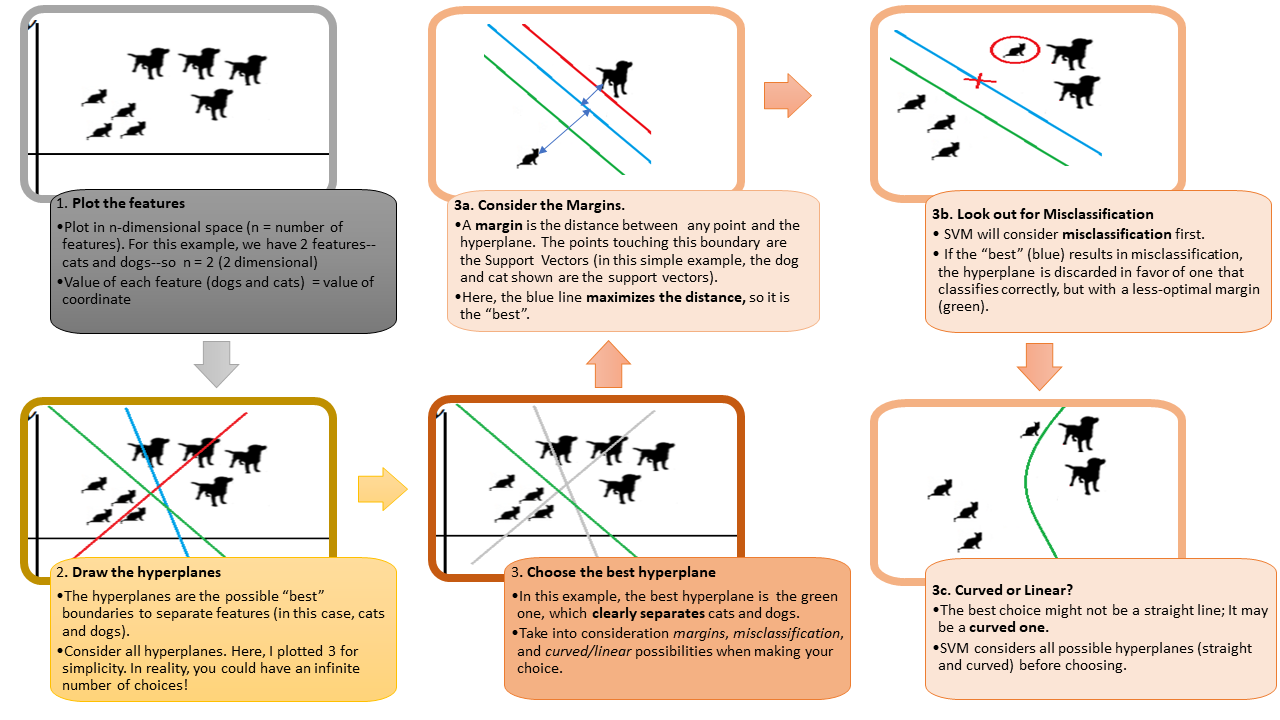

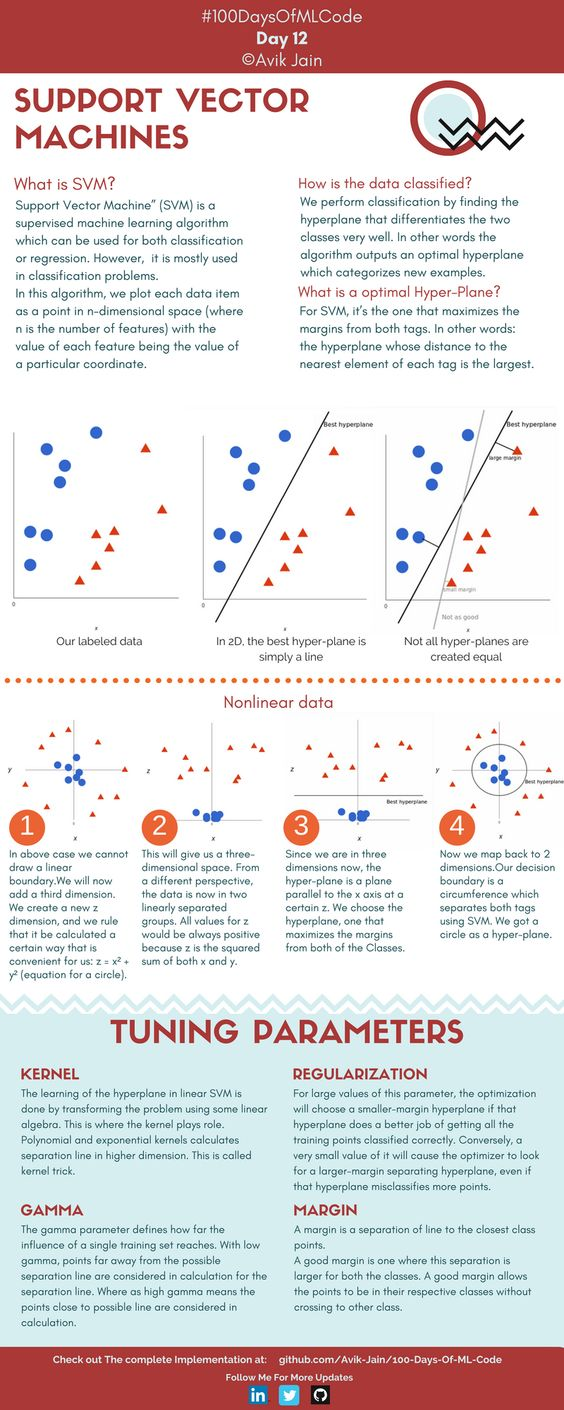